# Data Loading

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms
from torchvision.datasets import MNIST

%matplotlib inline

batch_size = 12

train_data = MNIST("/content/drive/MyDrive/3학년2학기/인공지능/term project/datasets", train = True, download=True, transform=transforms.ToTensor())
test_data = MNIST("/content/drive/MyDrive/3학년2학기/인공지능/term project/datasets", train= False, download=True, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_data, 
                         batch_size=batch_size,
                         shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_data, 
                         batch_size=batch_size,
                         )

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Model

In [2]:
class MLP(nn.Module):
  def __init__(self):
    super().__init__()

    self.in_dim = 28*28
    self.out_dim = 10 

    self.fc1 = nn.Linear(self.in_dim, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 128)
    self.fc4 = nn.Linear(128, 64)
    self.fc5 = nn.Linear(64, self.out_dim)

    self.relu = nn.ReLU()
    self.log_softmax = nn.LogSoftmax()

  def forward(self,x):
    a1 = self.relu(self.fc1(x.view(-1,self.in_dim)))
    a2 = self.relu(self.fc2(a1))
    a3 = self.relu(self.fc3(a2))
    a4 = self.relu(self.fc4(a3))
    logit = self.fc5(a4)
    return logit

  def visualization_forward(self,x):
    z1 = self.fc1(x.view(-1,self.in_dim))
    a1 = self.relu(z1)
    z2 = self.fc2(a1)
    a2 = self.relu(z2)
    a3 = self.relu(self.fc3(a2))
    a4 = self.relu(self.fc4(a3))
    logit = self.fc5(a4)
    return logit, z1, a1, z2, a2

# Training 

In [3]:
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [4]:
for epoch in range(10):
  running_loss = 0.0
  for i, (inputs, labels) in enumerate(train_loader, 0):

    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if (i+1) % 2000 == 0:
      print('[%d, %5d] loss: %.3f' % 
            (epoch + 1,i + 1,running_loss / 2000))
      running_loss = 0.0


[1,  2000] loss: 2.219
[1,  4000] loss: 0.744
[2,  2000] loss: 0.320
[2,  4000] loss: 0.238
[3,  2000] loss: 0.162
[3,  4000] loss: 0.140
[4,  2000] loss: 0.110
[4,  4000] loss: 0.100
[5,  2000] loss: 0.077
[5,  4000] loss: 0.081
[6,  2000] loss: 0.058
[6,  4000] loss: 0.061
[7,  2000] loss: 0.046
[7,  4000] loss: 0.051
[8,  2000] loss: 0.035
[8,  4000] loss: 0.041
[9,  2000] loss: 0.029
[9,  4000] loss: 0.030
[10,  2000] loss: 0.022
[10,  4000] loss: 0.024


# Testing

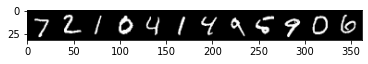

GroundTruth
    7   2   1   0   4   1   4   9   5   9   0   6
Prediction
    7   2   1   0   4   1   4   9   5   9   0   6


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, nrow = batch_size))
print('GroundTruth')
print("  " + ' '.join('%3s' % label.item() for label in labels))

outputs = model(images)
_, predicted = torch.max(outputs,1)
print("Prediction")
print("  " + ' '.join('%3s' % label.item() for label in predicted))

In [6]:
n_predict = 0
n_correct = 0

for data in test_loader:
  inputs, labels = data
  outputs = model(inputs)
  _, predicted = torch.max(outputs, 1)

  n_predict += len(predicted)
  n_correct += (labels == predicted).sum()

print(f"{n_correct}/{n_predict}")
print(f"Accuracy: {n_correct/n_predict:.3f}")

9761/10000
Accuracy: 0.976


# Visualization
## data preparation

In [7]:
from __future__ import print_function
import time
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [8]:
visual_loader = torch.utils.data.DataLoader(dataset=test_data, 
                         batch_size=len(test_data),
                         ) 
images, labels = iter(visual_loader).next()
images = images.numpy().reshape(len(test_data),-1)
labels = labels.numpy()

X = images / 255.0
y = labels

print(f'X.shape : {X.shape}')
print(f'y.shape : {y.shape}')

X.shape : (10000, 784)
y.shape : (10000,)


In [9]:
feat_cols = {f'pixel{i}' for i in range(X.shape[1])}
df = pd.DataFrame(X, columns=feat_cols)
df["y"] = y
df

,pixel725,pixel726,pixel732,pixel144,pixel507,pixel128,pixel721,pixel78,pixel101,pixel597,pixel684,pixel234,pixel79,pixel193,pixel292,pixel301,pixel687,pixel621,pixel281,pixel5,pixel47,pixel149,pixel350,pixel670,pixel272,pixel607,pixel117,pixel531,pixel48,pixel143,pixel715,pixel681,pixel692,pixel244,pixel203,pixel383,pixel150,pixel83,pixel187,pixel779,...,pixel237,pixel81,pixel369,pixel11,pixel484,pixel411,pixel679,pixel473,pixel42,pixel38,pixel278,pixel664,pixel636,pixel311,pixel551,pixel698,pixel300,pixel136,pixel424,pixel152,pixel487,pixel153,pixel416,pixel666,pixel290,pixel2,pixel61,pixel380,pixel13,pixel622,pixel53,pixel365,pixel528,pixel589,pixel302,pixel711,pixel738,pixel680,pixel478,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [10]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

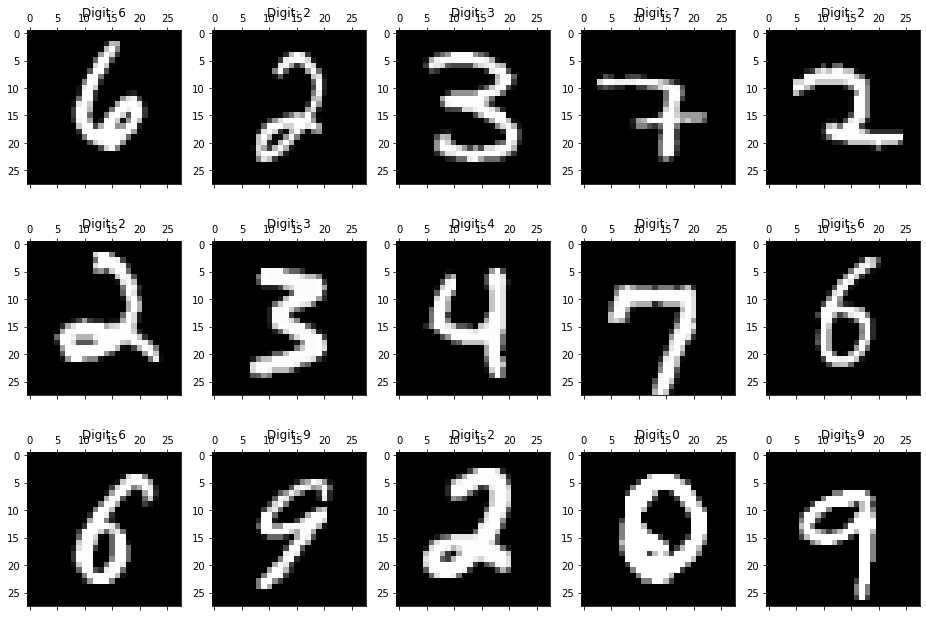

In [11]:
plt.gray()
fig = plt.figure(figsize=(16,11))
for i in range(0,15):
  ax = fig.add_subplot(3,5,i+1,title="Digit: {}".format(str(df.loc[rndperm[i],'y'])))
  ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))

## Input image visualization - PCA, TSNE

In [12]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
print('Explained variation per principal component : {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component : [0.10047685 0.07544506]


In [13]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1]
print('Explained variation per principal component : {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component : [0.10047653 0.0754448 ]


In [14]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
print('tsne done! Time elapsed: {} seconds'.format(time.time() - time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.106s...
[t-SNE] Computed neighbors for 10000 samples in 187.749s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.008350
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.919777
[t-SNE] KL divergence after 300 iterations: 2.780472
tsne done! Time elapsed

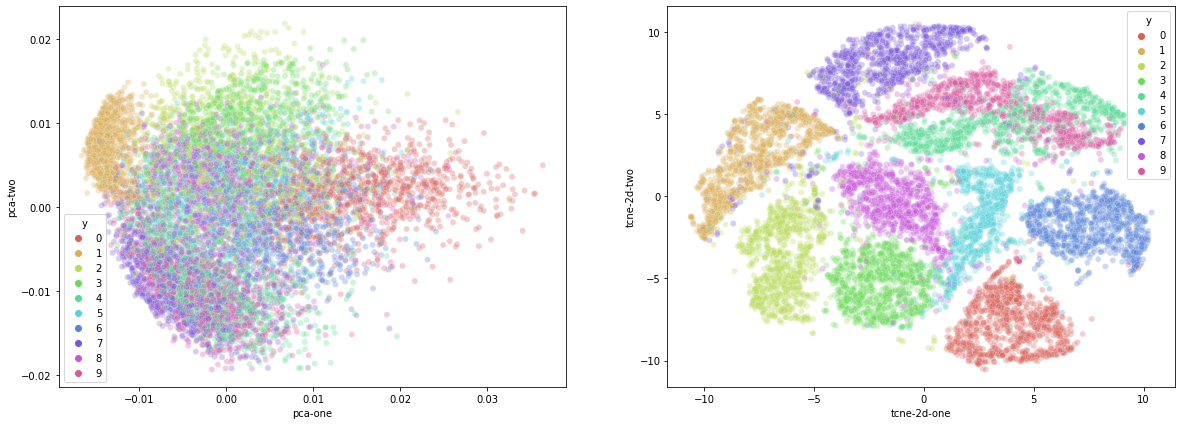

In [15]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
sns.scatterplot(
    x="pca-one",y="pca-two",
    hue="y",
    palette=sns.color_palette("hls",10),
    data = df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

plt.subplot(1,2,2)
sns.scatterplot(
    x="tsne-2d-one",y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls",10),
    data = df_subset.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

## hidden layer visualization - PCA,TSNE

In [107]:
class Visualizer:
  def __init__(self,parameter):
    if parameter not in ['z1','a1','z2','a2']:
      raise ValueError
    else:
      self.parameter = parameter    
      self.total = np.array([])
      self.total_labels = np.array([])
  
  def make_df(self, test_loader):
    for i, data in enumerate(test_loader,0):
      inputs, labels = data
      _,z1,a1,z2,a2 = model.visualization_forward(inputs)
      if (i == 0):
        self.total = eval(self.parameter).detach().numpy().copy()
        self.total_labels = labels
      else:
        self.total = np.concatenate((self.total,eval(self.parameter).detach().numpy()),axis=0)
        self.total_labels = np.concatenate((self.total_labels,labels.numpy()),axis=0)

    self.df = pd.DataFrame(self.total)
    self.df["y"] = self.total_labels

    return

  def show_PCA(self):
    pca = PCA(n_components=2)
    df_pca = self.df.iloc[:,:-1].copy()
    pca_result = pca.fit_transform(df_pca.values)
    self.df['pca-one'] = pca_result[:,0]
    self.df['pca-two'] = pca_result[:,1]
    print('Explained variation per principal component : {}'.format(pca.explained_variance_ratio_))

    # plt.figure(figsize=(10,7))
    sns.scatterplot(
        x="pca-one",y="pca-two",
        hue="y",
        palette=sns.color_palette("hls",10),
        data = self.df.loc[rndperm,:],
        legend="full",
        alpha=0.3
    )
    
    self.df.drop(["pca-one","pca-two"],axis=1,inplace=True)
    return

  def show_TSNE(self):
    df_tsne = self.df.loc[rndperm[:10000],:].copy()
    data_tsne = df_tsne.iloc[:,:-1].values
    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(data_tsne)
    df_tsne['tsne-2d-one'] = tsne_results[:,0]
    df_tsne['tsne-2d-two'] = tsne_results[:,1]
    print('tsne done! Time elapsed: {} seconds'.format(time.time() - time_start))

    # plt.figure(figsize=(10,7))
    sns.scatterplot(
    x="tsne-2d-one",y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls",10),
    data = df_tsne,
    legend="full",
    alpha=0.3
    )

    return


In [108]:
for parameter in ["z1","a1","z2","a2"]:
  print("parameter : ", parameter)
  test = Visualizer(parameter)
  test.make_df(test_loader)
  plt.figure(figsize=(20,7))
  plt.subplot(1,2,1)
  test.show_PCA()
  plt.subplot(1,2,2)
  test.show_TSNE()

Output hidden; open in https://colab.research.google.com to view.